In [102]:
import pandas as pd
# !mkdir Data
# !rm -rf Data/train.csv
# !aws s3 cp s3://phdata-nlp-s3-bucket/train.csv  Data/
# !wget https://s3.amazonaws.com/fast-ai-nlp/amazon_review_polarity_csv.tgz 
# !tar -xvzf amazon_review_polarity_csv.tgz
# !rm -rf  amazon_review_polarity_csv
# !mkdir -p Data/
# !cp amazon_review_polarity_csv/train.csv Data/
df = pd.read_csv("Data/combined_title_and_negative_reviews.csv", names=["Review"])

In [103]:
df[:10]

,Review
0,"Buyer beware This is a self-published book, an..."
1,The Worst! A complete waste of time. Typograph...
2,Oh please I guess you have to be a romance nov...
3,Awful beyond belief! I feel I have to write to...
4,Another Abysmal Digital Copy Rather than scrat...
5,Batteries died within a year ... I bought this...
6,"should be titled ""Hollywood Debacle"" The plot ..."
7,Nothing you don't already know If you have eve...
8,Doesn't work on a Mac It clearly says on line ...
9,TERRIBLE!! DO NOT BUY THIS I bought this for m...


In [5]:
# df_negative=df[df["Label"] == 2].filter(items=["Title","Review"]).count()
# df['combined_title_and_review'] = df['Title'].astype(str) + "." + df['Review'].astype(str)

In [6]:
!aws s3 cp s3://phdata-nlp-s3-bucket/output_from_comprehend/output.tar.gz .

In [7]:
!tar -xvzf output.tar.gz

In [100]:
df_doc_terms = pd.read_csv("doc-topics.csv")
df_top_terms=pd.read_csv("topic-terms.csv")

In [99]:
df_doc_terms['ranks']=df_doc_terms.groupby(by=['docname'])['proportion'].rank(method="first", ascending=True)
df_doc_terms["ranks"] = df_doc_terms['ranks'].astype(int)
df_doc_terms=df_doc_terms[df_doc_terms['ranks']==1]

In [52]:
import numpy as np
# df_top_terms[df_top_terms['topic']== 0]

map_reviews= ['book','review','quality','operational','media','movie','music','battery life','order-related','enterntainment']
dict_l={}
l=[]

for index, row in df_doc_terms.iterrows():
    index_pos=int(row['docname'].split(":")[1]) 
    topic_no=int(row['topic'])
    map_revews_colname=map_reviews[topic_no]
#     if  str(index_pos) in dict_l:
#         l=dict_l[index_pos]
#         l.append(map_revews_colname)
#         dict_l[index_pos]=l
#     else:
#     l=[]
#     l.append(map_revews_colname)
    dict_l[index_pos]=map_revews_colname
    
col_label=[]
for key, value in sorted(dict_l.items(), key=lambda item: item[0]):
    col_label.append(str(value))
    
df['topic']=pd.Series(col_label)

In [96]:
df[:10]

,Review,topic
0,__label__book Buyer beware This is a self-publ...,book
1,__label__book The Worst! A complete waste of t...,book
2,__label__book Oh please I guess you have to be...,book
3,__label__book Awful beyond belief! I feel I ha...,book
4,__label__book Another Abysmal Digital Copy Rat...,book
5,__label__battery life Batteries died within a ...,battery life
6,"__label__movie should be titled ""Hollywood Deb...",movie
7,__label__book Nothing you don't already know I...,book
8,__label__operational Doesn't work on a Mac It ...,operational
9,__label__enterntainment TERRIBLE!! DO NOT BUY ...,enterntainment


In [55]:
df['Review'] = "__label__"+df['topic'].astype(str) + " "+ df['Review'].astype(str)

In [57]:
df.to_csv(r'Data/labelled_reviews.csv')

In [58]:
!aws s3 cp Data/labelled_reviews.csv s3://phdata-nlp-s3-bucket/

upload: Data/labelled_reviews.csv to s3://phdata-nlp-s3-bucket/labelled_reviews.csv


In [93]:
df_topic_counts=df.groupby(['topic']).size().reset_index(name='counts')
df_topic_counts=df_topic_counts.sort_values(by='counts',ascending=False)

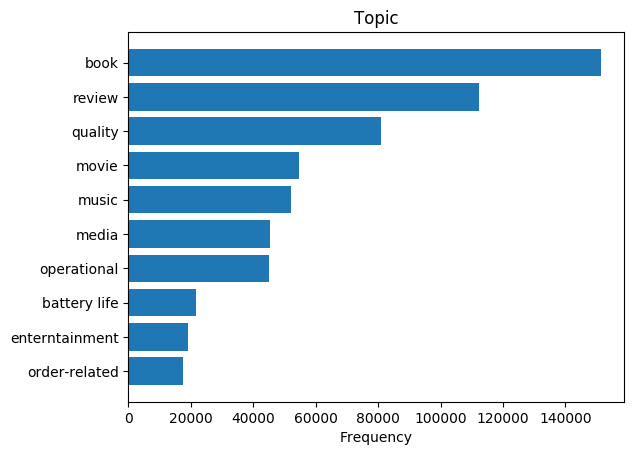

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(10)
performance = df_topic_counts['counts']

ax.barh(df_topic_counts['topic'], performance, align='center')
ax.set_yticks(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Frequency')
ax.set_title('Topic')

plt.show()